In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Target function
f = lambda x: 1.0/3.0 * x + 5.0

In [3]:
x = np.linspace(-20, 60, 50)
fx = f(x)

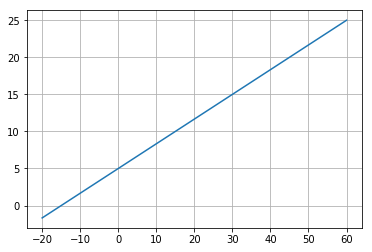

In [4]:
plt.plot(x,fx)
plt.grid()
plt.show()

In [5]:
np.random.rand(len(x))

array([ 0.78262727,  0.36524297,  0.27871313,  0.32557152,  0.01965997,
        0.17785242,  0.95742702,  0.89966069,  0.86790454,  0.7263208 ,
        0.01324632,  0.0013142 ,  0.15494109,  0.37813096,  0.74676816,
        0.31192206,  0.6528407 ,  0.59491467,  0.57626351,  0.96000318,
        0.30140556,  0.83291735,  0.25380283,  0.13716185,  0.02941223,
        0.76700702,  0.14389103,  0.9288465 ,  0.56871206,  0.9356779 ,
        0.79122841,  0.04659654,  0.84845169,  0.84987392,  0.83077204,
        0.38209126,  0.7832661 ,  0.66171478,  0.87876874,  0.27607376,
        0.61345399,  0.4770959 ,  0.81538794,  0.06091675,  0.603058  ,
        0.46449685,  0.526765  ,  0.18770103,  0.5238004 ,  0.46117787])

In [6]:
# add random noise
np.random.seed(306)
y = fx + 10 * np.random.rand(len(x))

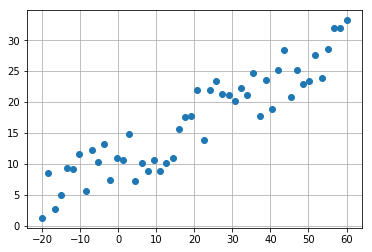

In [7]:
plt.plot(x,y, 'o')
plt.grid()
plt.show()

## 프로그램 실습 : 선형 회귀
주어진 데이터 $(x_i, y_i)$ for $i=1, 50$에 대하여 아래 loss function을 최소화하는 $a$와 $b$를 구하시오.
\begin{equation}
\min_{a,b} \sum_{i=1}^{50}|ax_i+b - y_i|^2
\end{equation}

1. `from numerical_optimizer import something`
1. Define loss function
1. Define grad function
1. (Optional) Define hess function
1. Tunning Parameter
    1. learning_rate
    1. MaxIter

### Version 1 : Steepest Descent

In [8]:
def loss(a, b):
    return np.sum( (a * x + b - y)**2 )

def grad_a(a, b):
    return np.sum( 2 * x * (a * x + b - y) )

def grad_b(a, b):
    return np.sum( 2 * (a * x + b - y) )

In [9]:
a_0 = -0.5
b_0 = 2.0
from numerical_optimizers import steepest_descent_2d

In [10]:
# TODO
w0 = np.array([a_0, b_0])
wopt, _, _, _ = steepest_descent_2d(loss, grad_a, grad_b, w0, 
                                    verbose=False, learning_rate=1E-5, MaxIter=4000)
print(wopt)

[ 0.33555863  9.70209383]


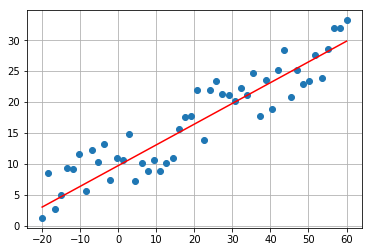

In [11]:
a_opt = wopt[0]
b_opt = wopt[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()

### Version 2 : Newton Method

In [12]:
def hess_loss(a, b):
    return np.array([[np.sum(2 * x * x), np.sum(2 * x )],[np.sum(2 * x ),2 * 50.]])

In [13]:
from numerical_optimizers import newton_descent_2d
wopt, _, _, _ = newton_descent_2d(loss, grad_a, grad_b, hess_loss, w0, 
                                    verbose=False, learning_rate=1, MaxIter=1)
print(wopt)

[  0.31810453  10.53510921]


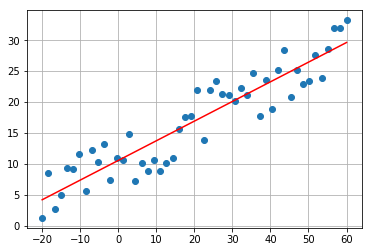

In [14]:
a_opt = wopt[0]
b_opt = wopt[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()

In [15]:
def loss(w):
    return np.sum( (w[0] * x + w[1] - y)**2 )

In [16]:
from scipy.optimize import minimize
res = minimize(loss, w0)
print(res)

      fun: 472.4377897592981
 hess_inv: array([[  1.80147105e-05,  -3.60294247e-04],
       [ -3.60294247e-04,   1.72058840e-02]])
      jac: array([ -3.81469727e-06,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([  0.31810451,  10.53510951])


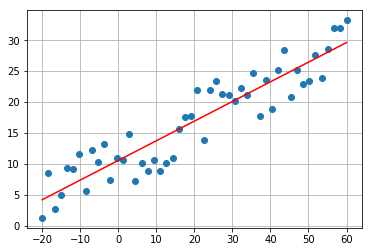

In [17]:
a_opt = res.x[0]
b_opt = res.x[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()

     fun: 472.4377897592965
     jac: array([  7.62939453e-06,  -3.81469727e-06])
 message: 'Optimization terminated successfully.'
    nfev: 84
     nit: 10
    njev: 21
  status: 0
 success: True
       x: array([  0.31810451,  10.53510941])


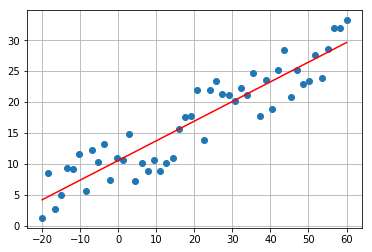

In [18]:
from scipy.optimize import minimize
res = minimize(loss, w0, method='CG')

print(res)

a_opt = res.x[0]
b_opt = res.x[1]

plt.plot(x,y, 'o')
plt.grid()
plt.plot(x, a_opt * x + b_opt, 'r-')
plt.show()